<a href="https://colab.research.google.com/github/Leo612loss312/mobile-price-classifier-1.0/blob/main/Mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOBILE PRICE CLASSIFICATION**




battery_power: Total energy a battery can store in one time measured in mAh
blue: Has bluetooth or not
clock_speed: speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Width
ram: Random Access Memory in Mega Byte
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: longest time that a single battery charge will last when you are
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import dataset
df=pd.read_csv('/content/Mobile price classification.csv')
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
df.shape

(1000, 21)

In [ ]:
df.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


**check null values**

In [ ]:
df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

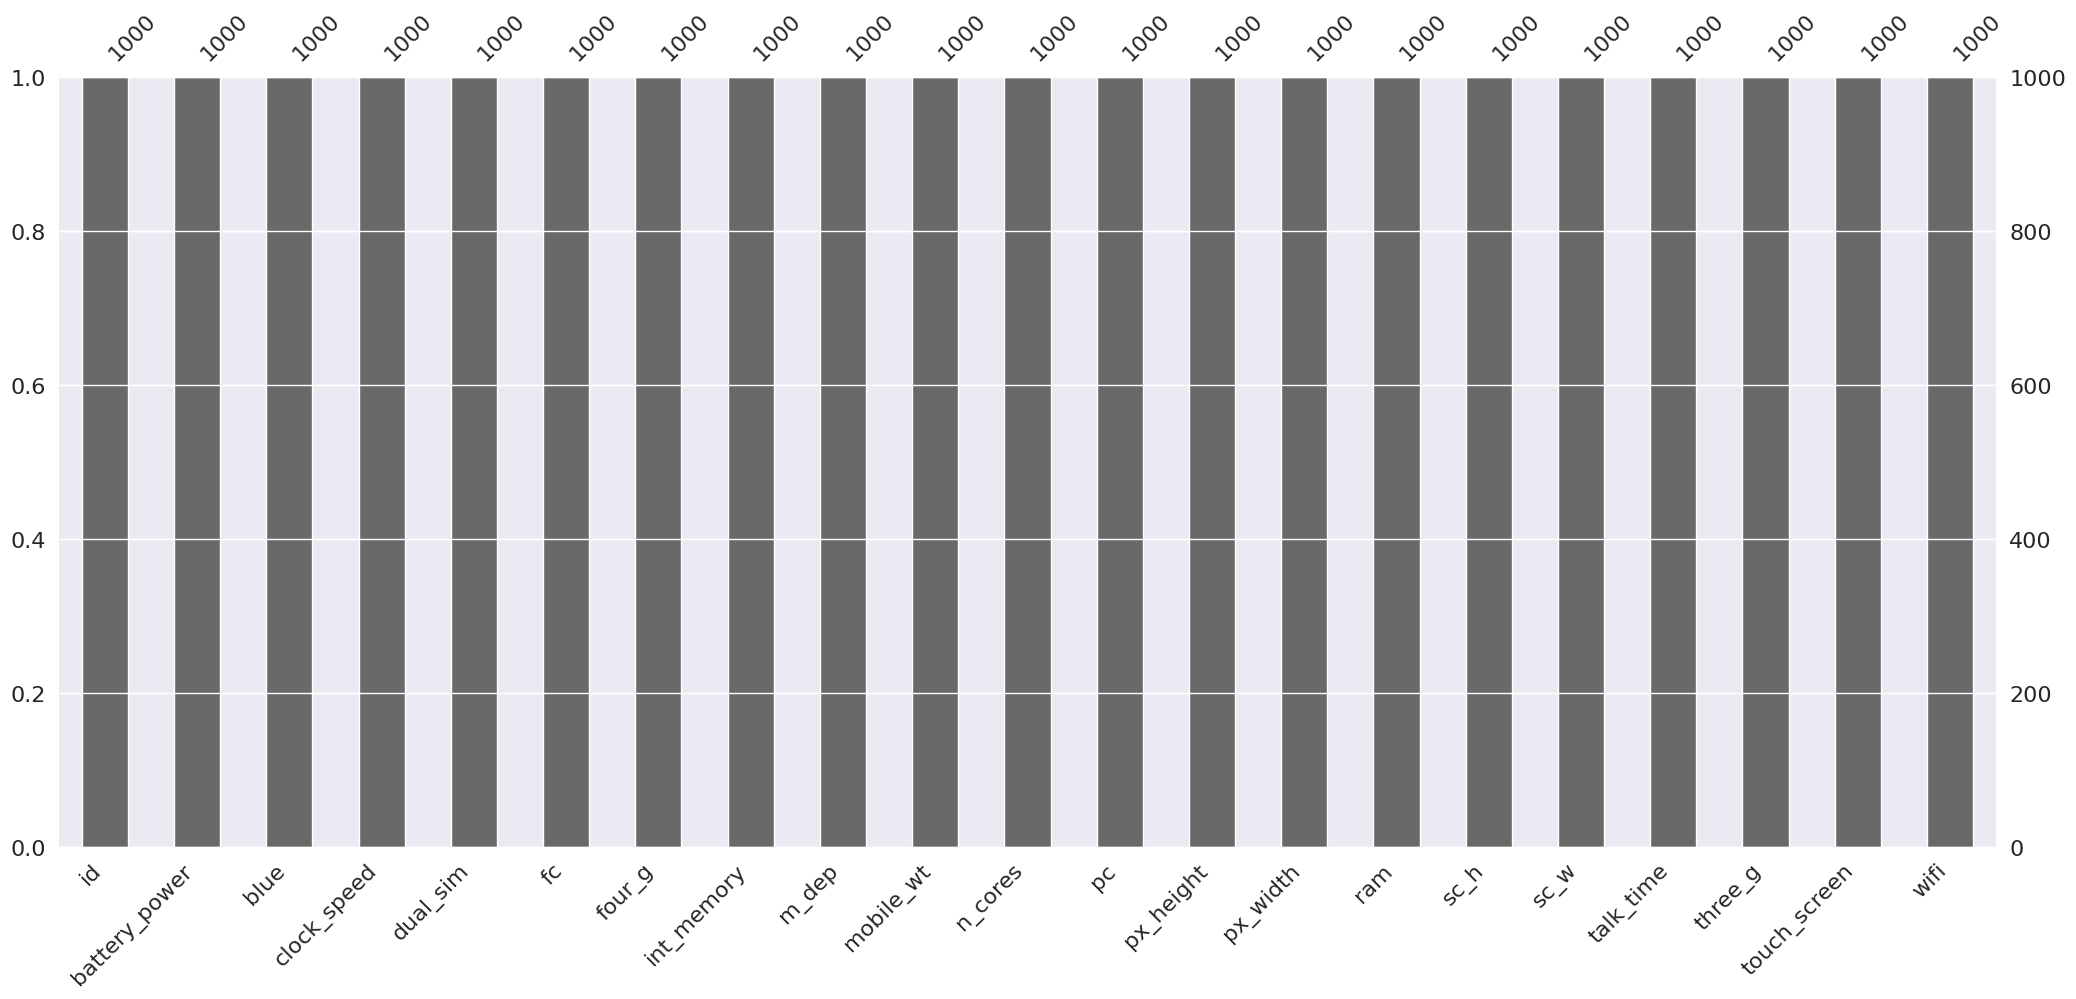

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

**checking the varience**

In [ ]:
df.var()

id               8.341667e+04
battery_power    1.870201e+05
blue             2.499940e-01
clock_speed      6.876849e-01
dual_sim         2.499610e-01
fc               1.992127e+01
four_g           2.500811e-01
int_memory       3.286495e+02
m_dep            7.888263e-02
mobile_wt        1.214631e+03
n_cores          5.235652e+00
pc               3.715023e+01
px_height        1.874281e+05
px_width         1.933106e+05
ram              1.183945e+06
sc_h             1.866764e+01
sc_w             1.797812e+01
talk_time        3.022400e+01
three_g          1.846486e-01
touch_screen     2.502503e-01
wifi             2.502012e-01
dtype: float64

In [ ]:
df['touch_screen'].unique()

array([1, 0])

# **Exploratory Data Analysis**

Relationship between ram and touch_screen

<Axes: xlabel='touch_screen', ylabel='ram'>

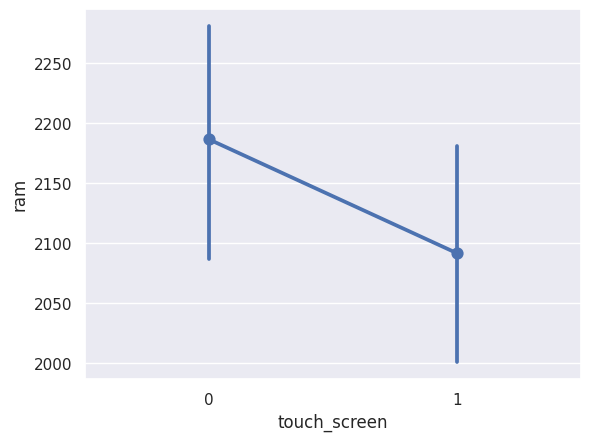

In [ ]:
sns.pointplot(y='ram',x='touch_screen',data=df)

<Axes: xlabel='ram', ylabel='battery_power'>

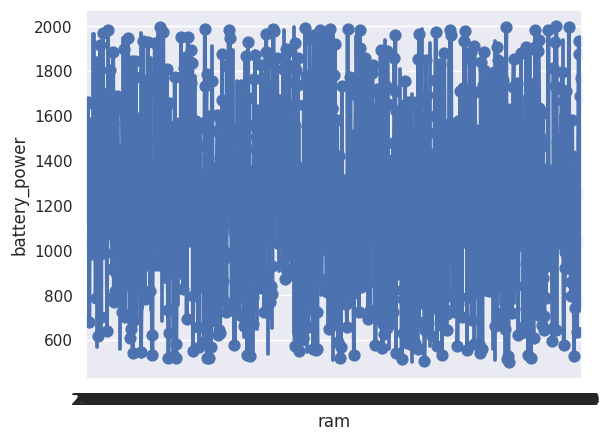

In [ ]:
sns.pointplot(x='ram',y='battery_power',data=df)

<Axes: xlabel='ram', ylabel='battery_power'>

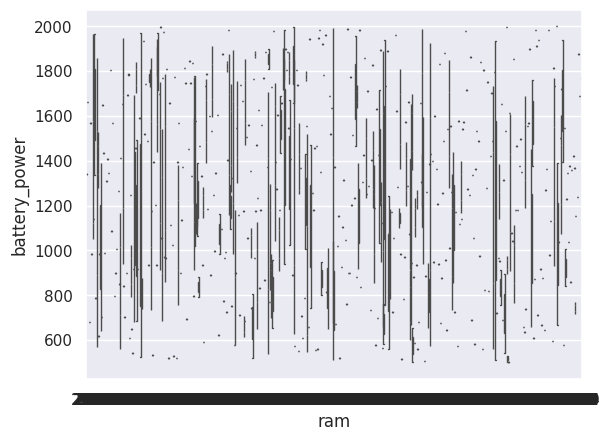

In [ ]:
sns.boxplot(x='ram',y='battery_power',data=df)

In [ ]:
col = df.columns
col

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','ram']

histogram

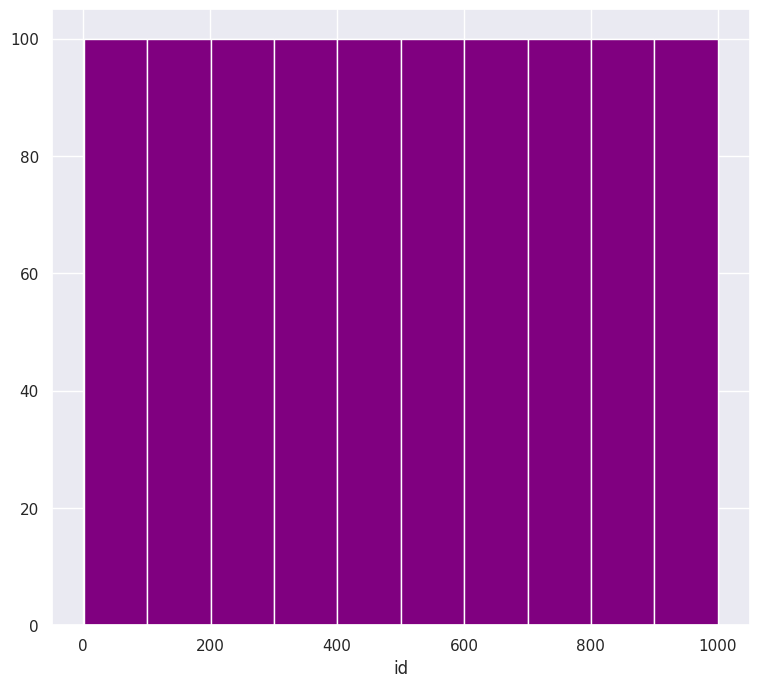

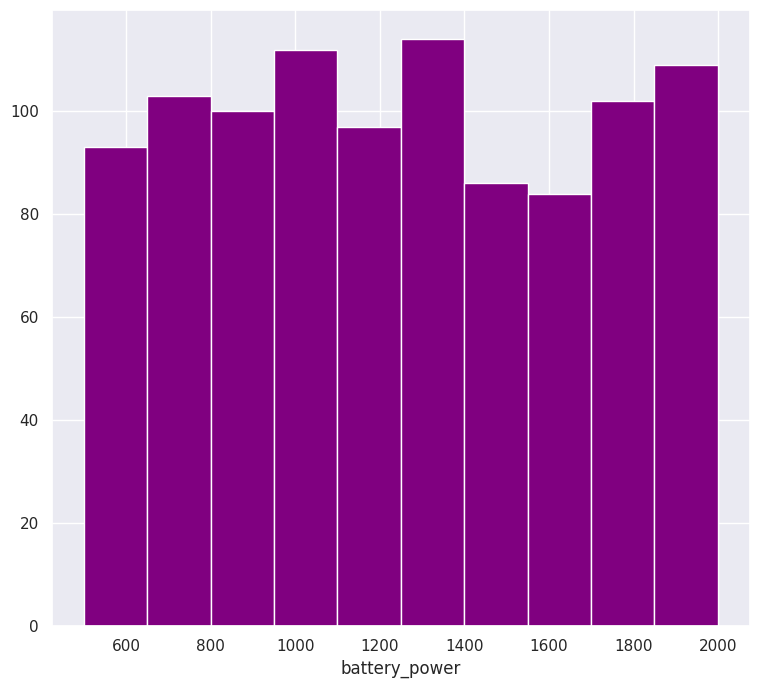

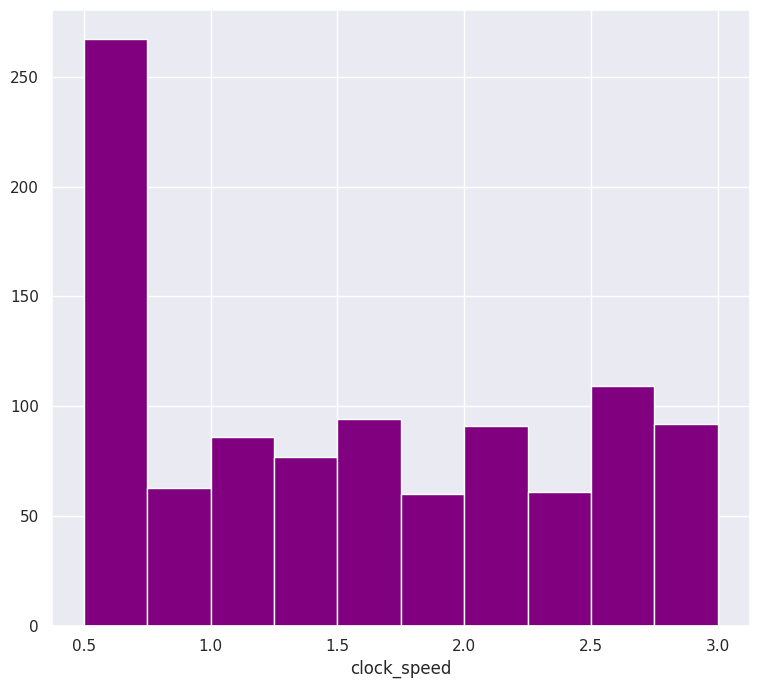

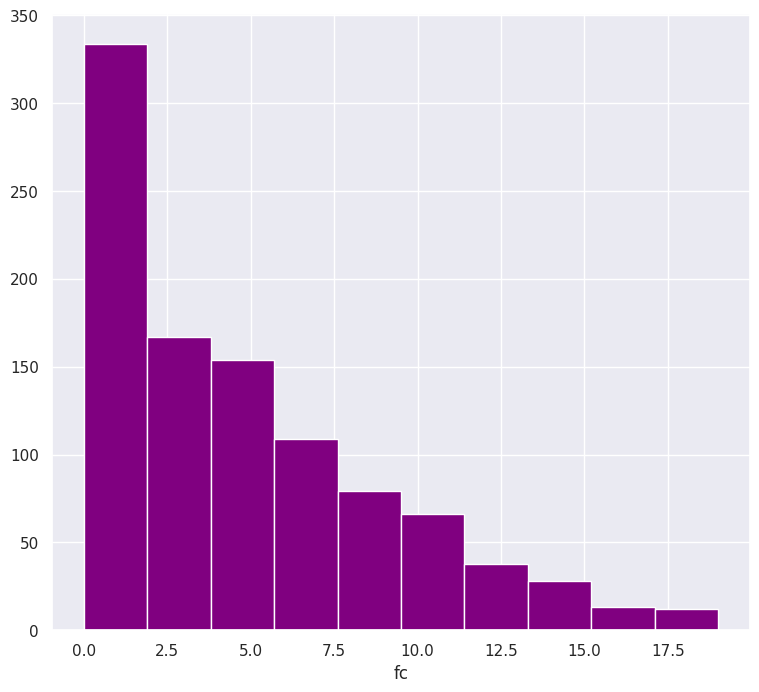

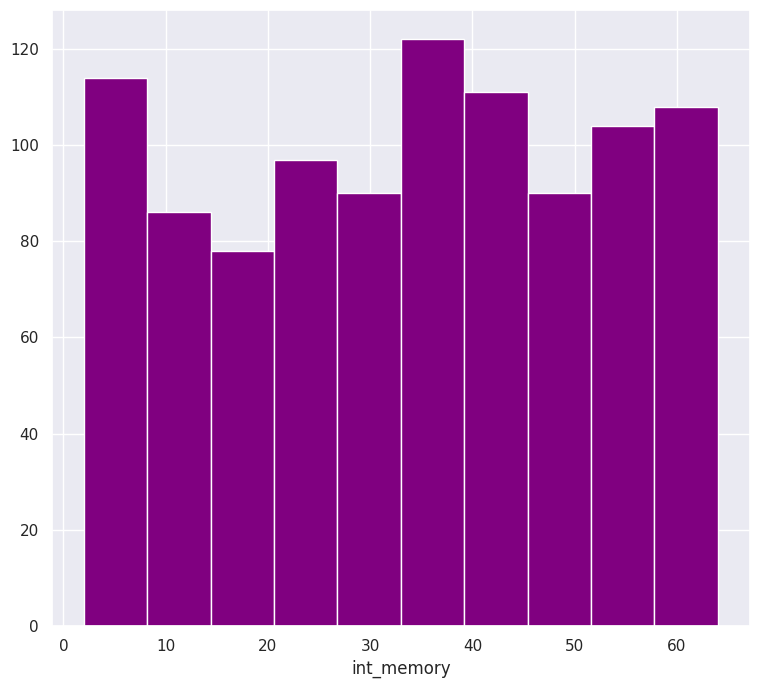

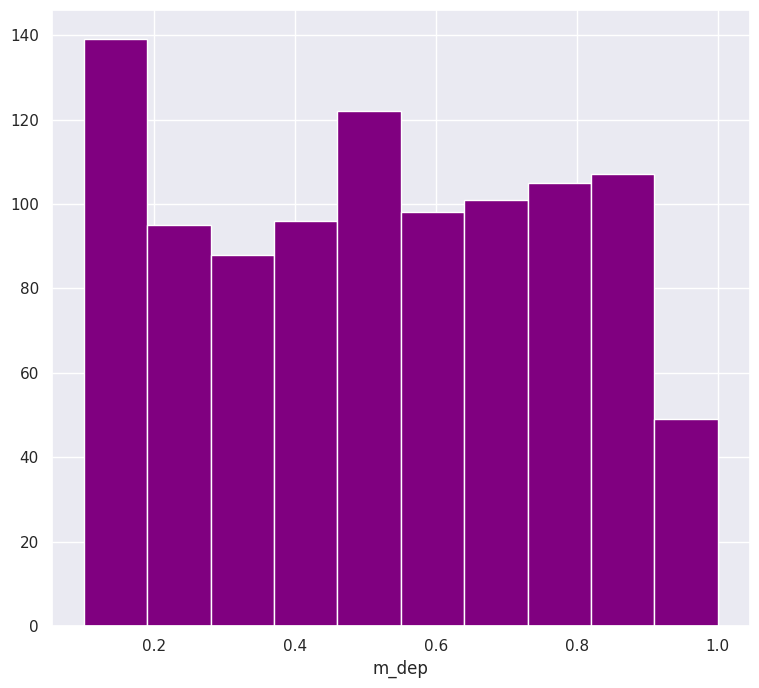

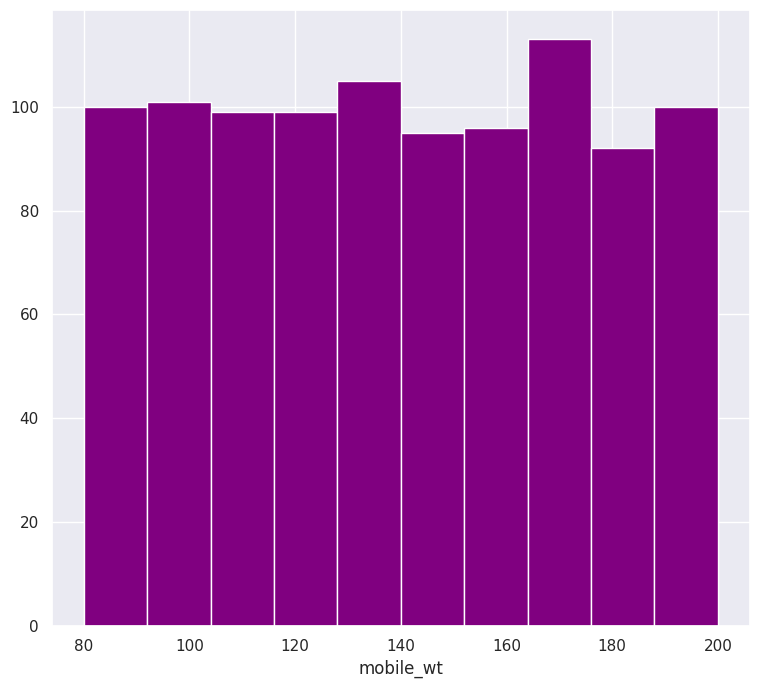

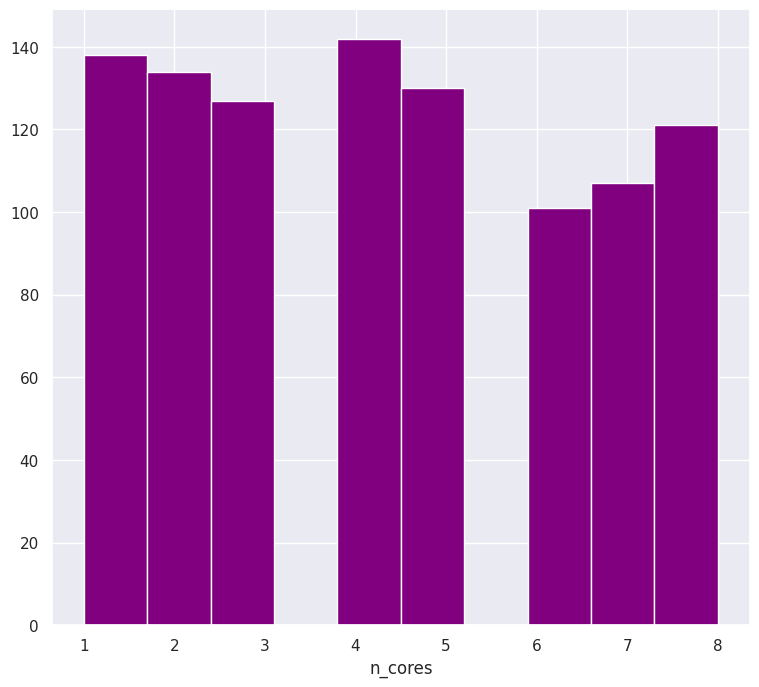

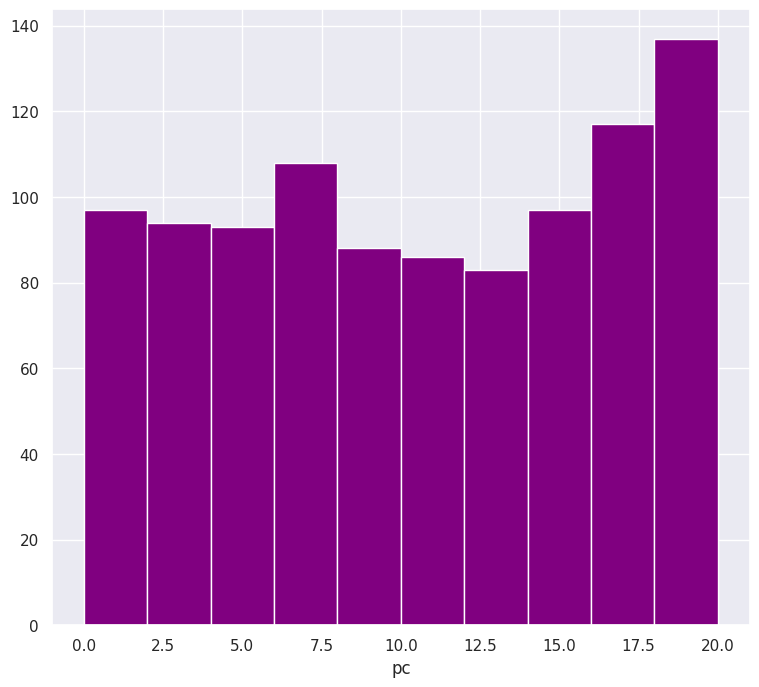

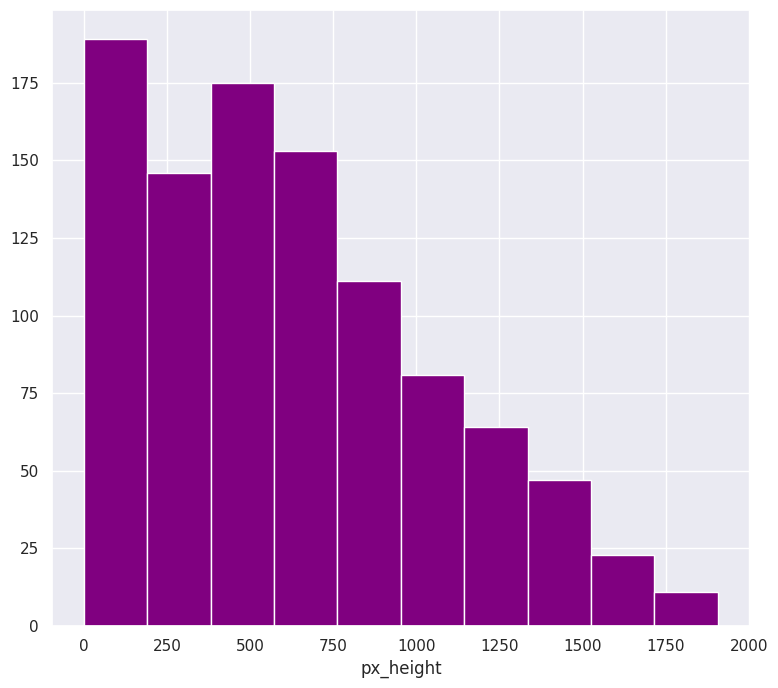

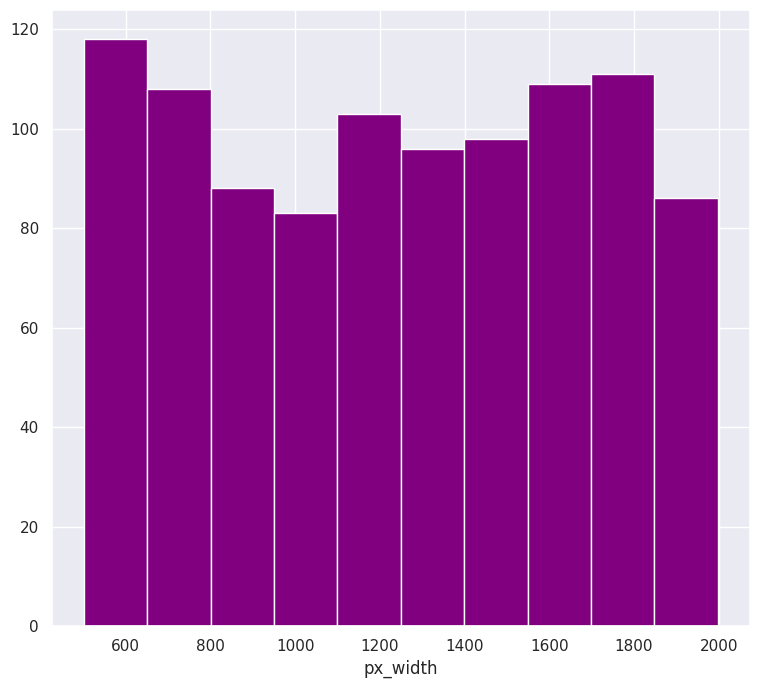

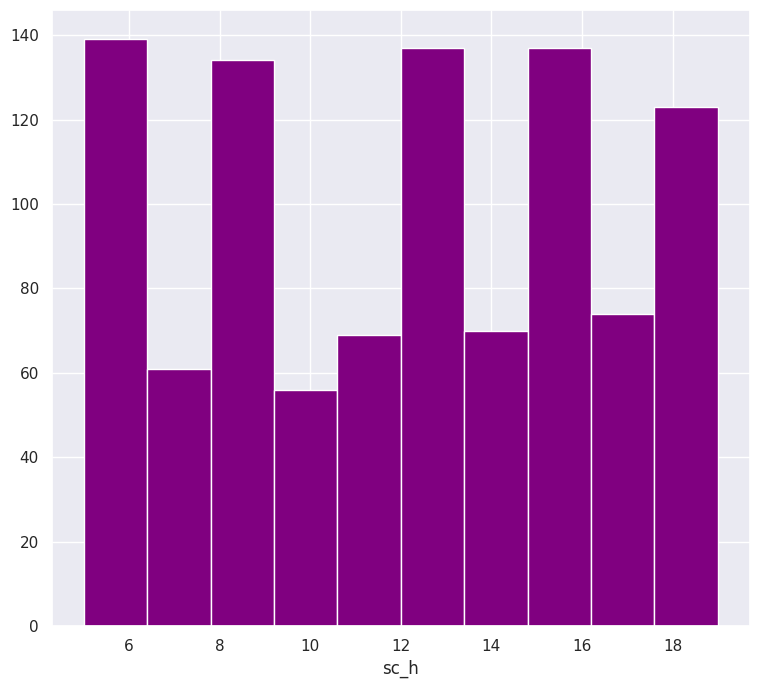

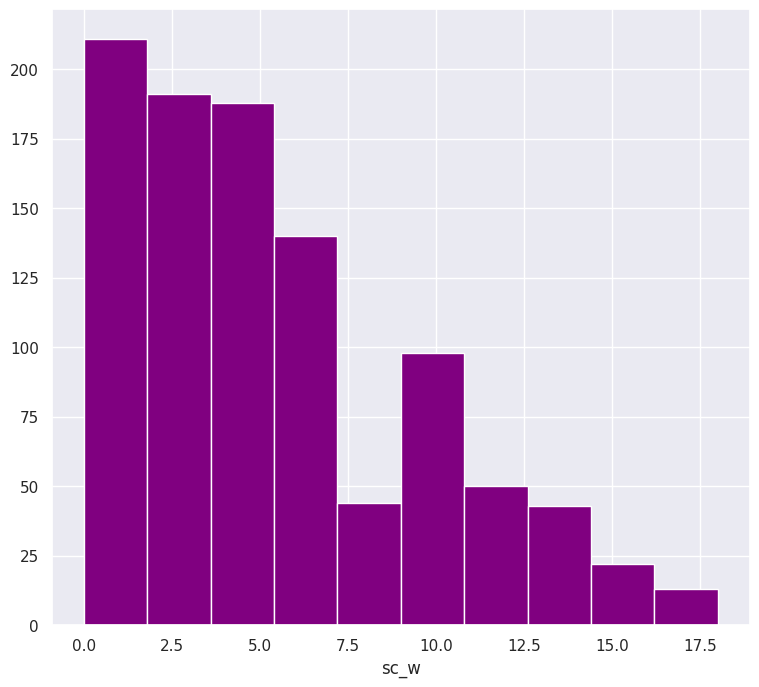

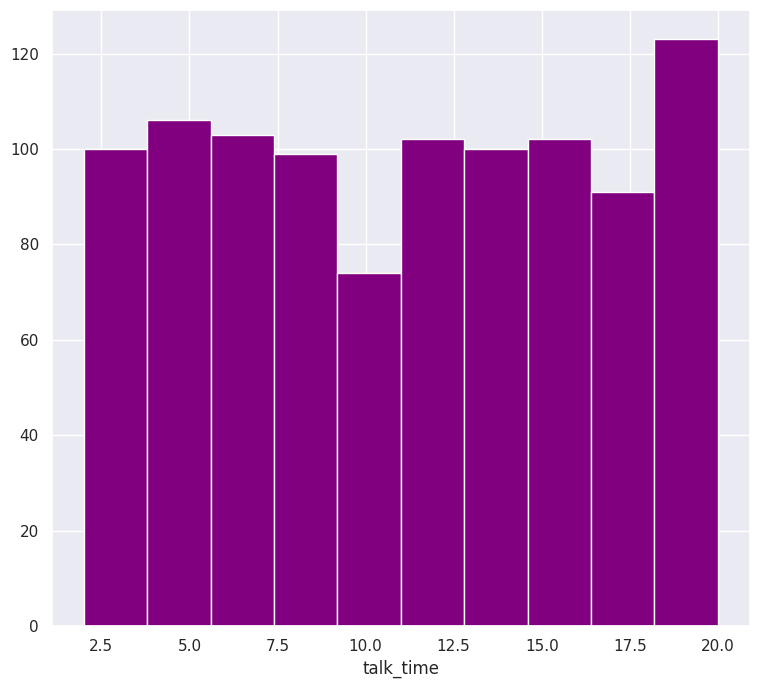

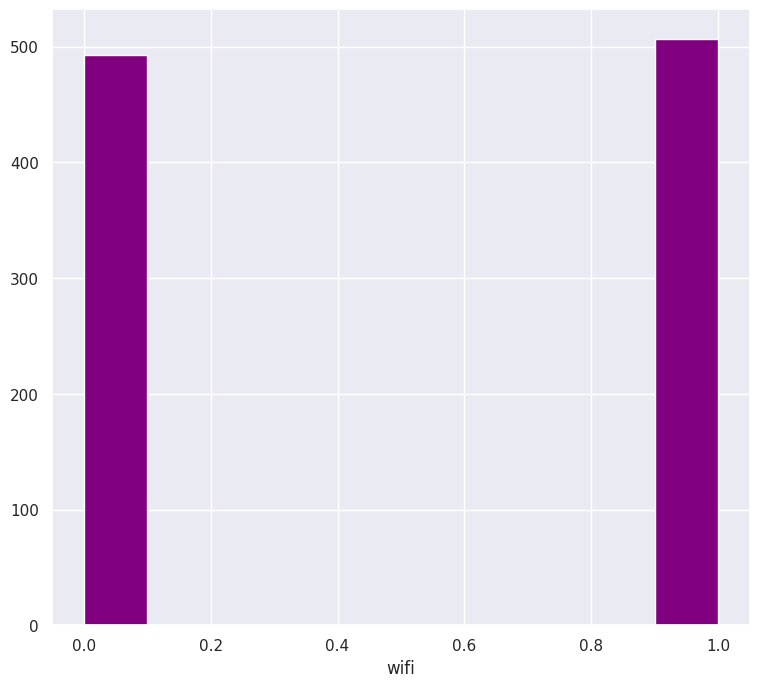

In [ ]:
for i in df.drop(df[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

Checking the correlation by plotting correlation plot.

Text(0.5, 1.0, 'Correlation ')

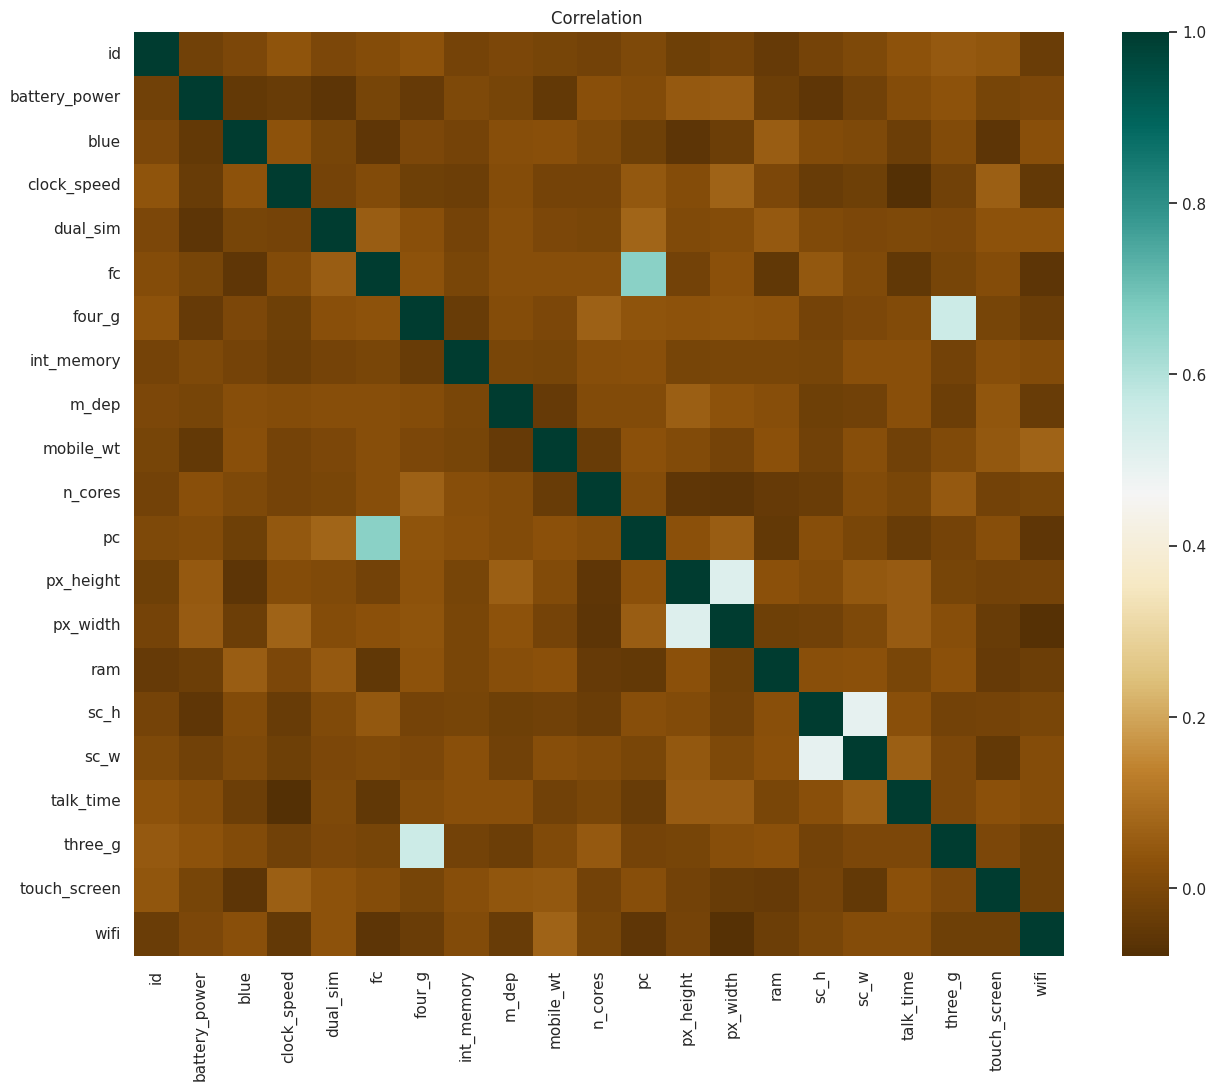

In [ ]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

<Axes: xlabel='touch_screen', ylabel='ram'>

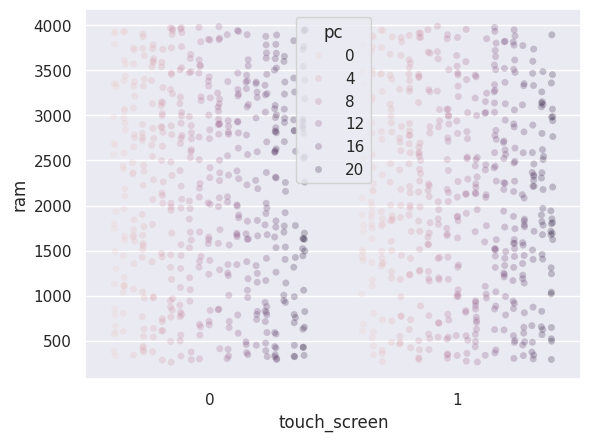

In [ ]:
# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="pc",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)


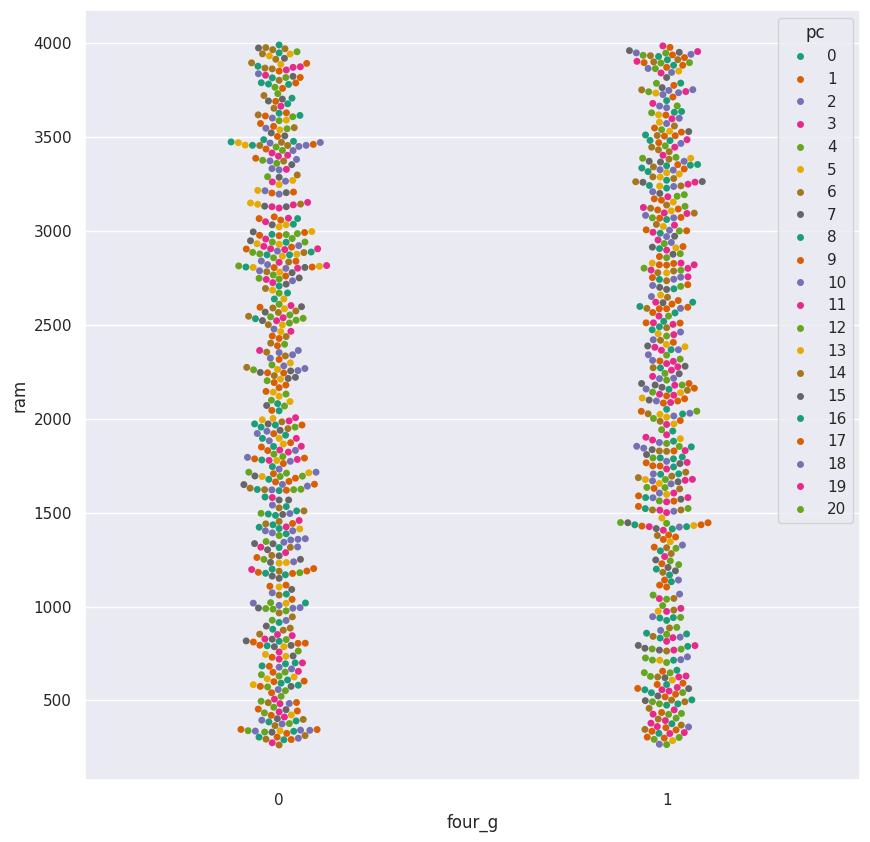

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="four_g", y="ram", hue="pc",
              palette="Dark2", data=df)
ax=sns.set(style="darkgrid")

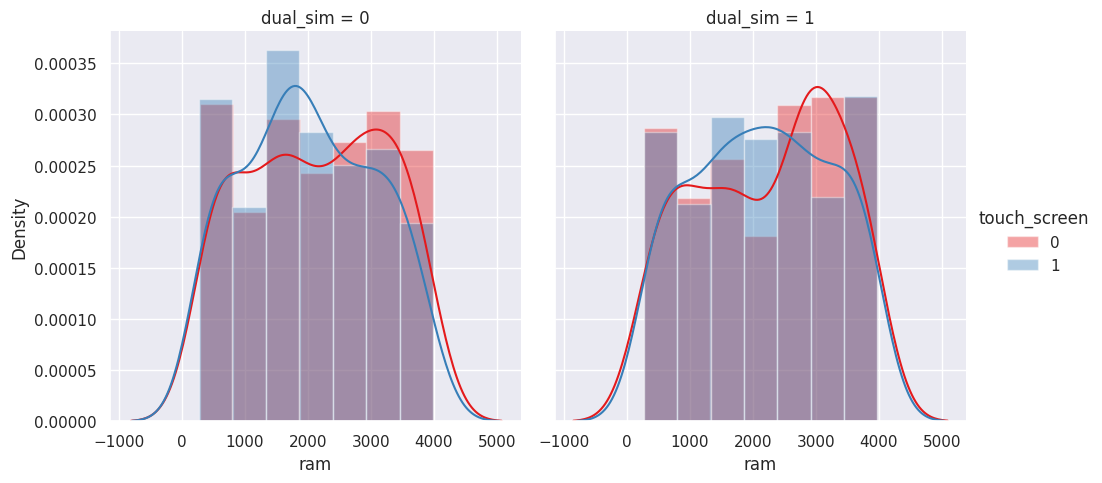

In [ ]:
g = sns.FacetGrid(df, col="dual_sim", hue="touch_screen", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

In [ ]:
x=df.drop('touch_screen',axis=1)
y=df['touch_screen']

In [ ]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.010959,id
1,1.026293,battery_power
2,1.016876,blue
3,1.025448,clock_speed
4,1.015626,dual_sim
5,1.794545,fc
6,1.468276,four_g
7,1.007012,int_memory
8,1.012900,m_dep
9,1.016538,mobile_wt


# **Models**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

1.logesticregression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)




y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:53.6
Test Set Accuracy:54.800000000000004

Confusion Matrix:
[[67 55]
 [58 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.54       122
           1       0.56      0.55      0.55       128

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.55      0.55      0.55       250



2.Neihbourclassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_test_pred1 = knn.predict(x_test)
y_train_pred1=knn.predict(x_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:64.93333333333334
Test Set Accuracy:52.0

Confusion Matrix:
[[79 74]
 [46 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       153
           1       0.41      0.53      0.46        97

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.55      0.52      0.53       250



3.SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_test_pred2 = svc.predict(x_test)
y_train_pred2=svc.predict(x_train)

svc_acc=accuracy_score(y_test_pred2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_test))

Train Set Accuracy:54.13333333333333
Test Set Accuracy:54.0

Confusion Matrix:
[[69 59]
 [56 66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       128
           1       0.53      0.54      0.53       122

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.54      0.54      0.54       250



4.Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_pred3 = dtc.predict(x_test)
y_train_pred3=dtc.predict(x_train)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:48.8

Confusion Matrix:
[[55 58]
 [70 67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.49      0.46       113
           1       0.54      0.49      0.51       137

    accuracy                           0.49       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.49      0.49      0.49       250



In [ ]:

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [ ]:
{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 7}

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 7}

In [ ]:
dtc = grid_search.best_estimator_

In [ ]:
y_predi=dtc.predict(x_test)

In [ ]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_predi)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 0.7853333333333333
Test Accuracy of SVC Model is 0.512


gradientboosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_test_pred6 = gbc.predict(x_test)
y_train_pred6=gbc.predict(x_train)

gbc_acc=accuracy_score(y_test_pred6,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:92.66666666666666
Test Set Accuracy:46.800000000000004

Confusion Matrix:
[[59 67]
 [66 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       126
           1       0.46      0.47      0.47       124

    accuracy                           0.47       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.47      0.47      0.47       250



6.XGBC classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(x_train, y_train)

y_test_pred7 = xgb.predict(x_test)
y_train_pred7=xgb.predict(x_train)

xgb_acc= accuracy_score(y_test_pred7,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred7,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred7,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred7,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred7,y_test))

Train Set Accuracy:64.8
Test Set Accuracy:46.0

Confusion Matrix:
[[43 53]
 [82 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.45      0.39        96
           1       0.58      0.47      0.52       154

    accuracy                           0.46       250
   macro avg       0.46      0.46      0.45       250
weighted avg       0.49      0.46      0.47       250



SVC classifier got the highest accuracy

""
